# CS 1656 – Introduction to Data Science 

## Instructor: Xiaowei Jia
### Teaching Assistants: Evangelos Karageorgos, Sonal Gupta


## Term Project 

**Released: April 7, 2022**

**Due: April 26, 2022**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob 
import math
import numpy as np
# Feel free to add 
# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [15]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

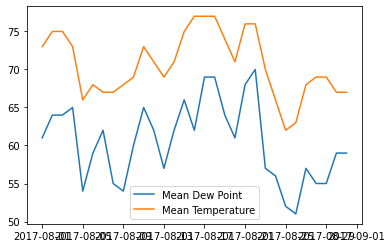

In [16]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()



--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [18]:
def calcrebal(curr):
    row = curr.name
    if row != 0: 
        prev = rebal.iloc[row-1]
        if curr['From station id'] != 0 and prev['To station id'] != 0 and curr['Bikeid'] == prev['Bikeid'] and curr['From station id'] != prev['To station id']:
            return 1

    return 0


In [19]:
%%time

'''
DAY | Station ID | fromCNT | toCNT | rebalCNT      
'''

df = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2021-*.csv')], ignore_index = True)

rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.date
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcrebal, axis=1)

fs = rebal[['Startdate', 'Bikeid', 'From station id']].copy()
fs = fs[fs.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
fs = fs.reset_index(drop=True)

tos = rebal[['Startdate', 'Bikeid', 'To station id']].copy()
tos = tos[tos.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
tos = tos.reset_index(drop=True)

rebalCNT_p = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_p.reset_index()
rebalCNT.columns = ['Day', 'StationID', 'rebalCNT']

fromCNT_p = pd.pivot_table(fs,index=['Startdate', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_p.reset_index()
fromCNT.columns = ['Day', 'StationID', 'fromCNT']
toCNT_p = pd.pivot_table(tos,index=['Startdate', 'To station id'], values=['To station id'],aggfunc=lambda x: len(x))
toCNT = toCNT_p.reset_index()
toCNT.columns = ['Day', 'StationID', 'toCNT']

rebalCNT = rebalCNT.sort_values(by=['Day', 'StationID'])
fromCNT = fromCNT.sort_values(by=['Day', 'StationID'])
toCNT = toCNT.sort_values(by=['Day', 'StationID'])

fromto = fromCNT.merge(toCNT, how='outer', on=['Day', 'StationID'])
fromto = fromto.fillna(0)
fromto = fromto.sort_values(by=['Day', 'StationID'])

df_final = pd.merge(fromto, rebalCNT, how='outer', on=['Day', 'StationID'])
df_final = df_final.fillna(0)

df_final.head(20)


CPU times: total: 9.95 s
Wall time: 10.4 s


,Day,StationID,fromCNT,toCNT,rebalCNT
0,2021-01-01,1002.0,1.0,1.0,0.0
1,2021-01-01,1010.0,1.0,0.0,0.0
2,2021-01-01,1017.0,0.0,2.0,0.0
3,2021-01-01,1024.0,1.0,1.0,0.0
4,2021-01-01,1028.0,1.0,1.0,0.0
5,2021-01-01,1032.0,1.0,0.0,0.0
6,2021-01-01,1039.0,0.0,1.0,0.0
7,2021-01-01,1059.0,1.0,1.0,0.0
8,2021-01-01,1062.0,2.0,2.0,0.0
9,2021-01-01,1094.0,2.0,0.0,0.0


### Task 1.2

In [21]:
rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.month
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcrebal, axis=1)

rebalCNT_p = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_p.reset_index()
rebalCNT.columns = ['Month', 'StationID', 'rebalCNT']

fs = rebal[['Startdate', 'Bikeid', 'From station id']].copy()
fs = fs[fs.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
fs = fs.reset_index(drop=True)

fromCNT_p = pd.pivot_table(fs,index=['Startdate', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_p.reset_index()
fromCNT.columns = ['Month', 'StationID', 'fromCNT']

tos = rebal[['Startdate', 'Bikeid', 'To station id']].copy()
tos = tos[tos.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
tos = tos.reset_index(drop=True)
toCNT_p = pd.pivot_table(tos,index=['Startdate', 'To station id'], values=['To station id'],aggfunc=lambda x: len(x))
toCNT = toCNT_p.reset_index()
toCNT.columns = ['Month', 'StationID', 'toCNT']

fromto = pd.merge(fromCNT, toCNT, how='right', on=['Month', 'StationID'])
fromto = fromto.sort_values(by=['Month', 'StationID'])
df_final_m = pd.merge(fromto, rebalCNT, how='outer', on=['Month', 'StationID'])
df_final_m = df_final_m.fillna(0)

df_final_m.head(20)

,Month,StationID,fromCNT,toCNT,rebalCNT
0,1,1000.0,23.0,29.0,2.0
1,1,1001.0,18.0,27.0,0.0
2,1,1002.0,27.0,27.0,3.0
3,1,1003.0,2.0,1.0,0.0
4,1,1004.0,20.0,16.0,3.0
5,1,1005.0,6.0,3.0,0.0
6,1,1006.0,8.0,8.0,1.0
7,1,1007.0,9.0,7.0,1.0
8,1,1009.0,8.0,3.0,0.0
9,1,1010.0,47.0,30.0,13.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [23]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

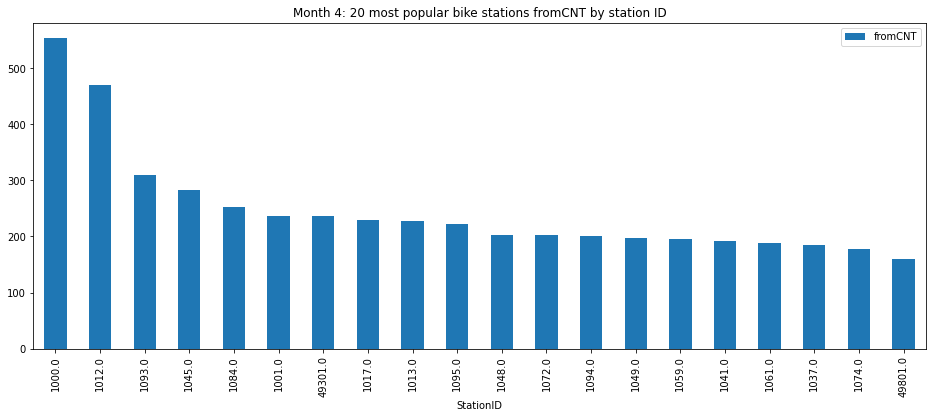

In [31]:
#  bar chart for the 20 most popular bikestations when considering the number of **fromCNT** per station monthly

df_2_1 = df_final_m.loc[df_final_m['Month'] == filter_month]
df_2_1 = df_2_1[['Month', 'StationID', 'fromCNT']]
df_2_1 = df_2_1.sort_values(by=['fromCNT'], ascending=False)
df_2_1 = df_2_1.head(20)
df_2_1 = df_2_1.drop(['Month'], axis=1)
df_2_1["StationID"] = df_21["StationID"].astype(str)

title = 'Month ' + str(filter_month) + ": 20 most popular bike stations fromCNT by station ID"
task21 = df_2_1.plot(x = 'StationID', y='fromCNT', kind='bar', rot=90, figsize=(16, 6), title=title)
plt.show()

### Task 2.2

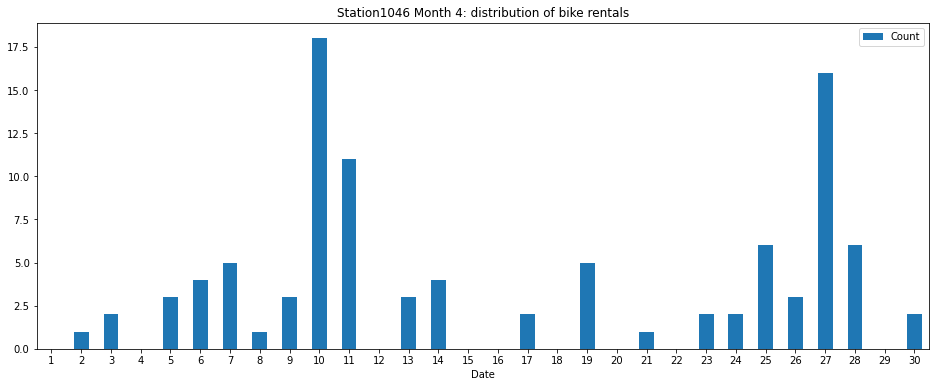

In [33]:
df_2_2 = df[['Starttime','From station id']].copy()
df_2_2 = df_2_2.copy()
df_2_2.columns = ['Date','Station ID']
df_2_2['Month'] = pd.to_datetime(df_2_2['Date']).dt.month
df_2_2 = df_2_2.loc[df_2_2['Month'] == filter_month]
df_2_2 = df_2_2.drop(['Month'], axis=1)
df_2_2['Date'] = pd.to_datetime(df_2_2['Date']).dt.day
df_2_2 = df_2_2.sort_values('Date')
df_2_2 = df_2_2.loc[df_2_2['Station ID'] == filter_stationID]
df_2_2 = df_2_2['Date'].groupby([df_2_2['Date']]).count()

days_of_month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

keys = df_2_2.keys()
counts = df_2_2.tolist()

for i in range(1, days_of_month[filter_month] + 1):
    if i not in keys:
        keys = keys.insert(i - 1, i)
        counts.insert(i - 1, 0)

df_2_2 = pd.DataFrame({'Date':keys, 'Count':counts})
ti = 'Station' + str(filter_stationID) + ' Month ' + str(filter_month) + ': distribution of bike rentals'
ax = df_2_2.plot.bar(x='Date', y='Count', rot=0, title=ti, figsize=(16,6))


### Task 2.3

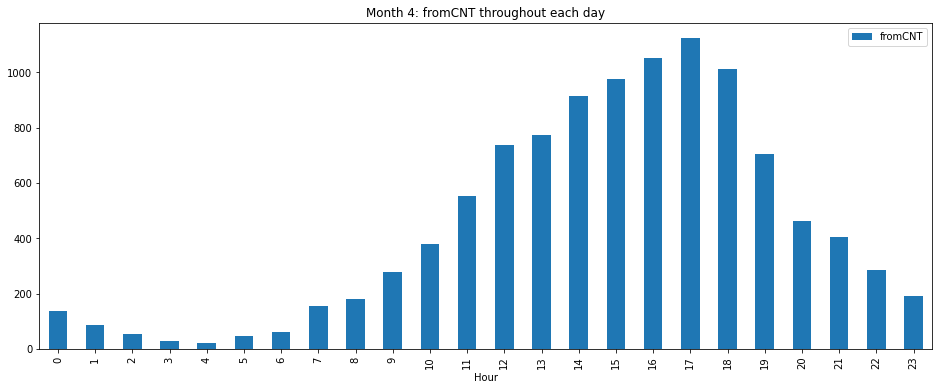

In [35]:

rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
fs = rebal[['Starttime', 'Bikeid', 'From station id']].copy()
fs = fs[fs.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
fs = fs.reset_index(drop=True)

fromCNT_p = pd.pivot_table(fs,index=['Starttime', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_p.reset_index()
fromCNT.columns = ['Day', 'StationID', 'fromCNT']

fromCNT['Month'] = pd.to_datetime(fromCNT['Day']).dt.month
fromCNT = fromCNT.loc[fromCNT['Month'] == filter_month]
fromCNT = fromCNT.drop(['Month'], axis=1)
fromCNT = fromCNT.drop(['StationID'], axis=1)
fromCNT['Hour'] = pd.to_datetime(fromCNT['Day']).dt.hour
fromCNT = fromCNT.drop(['Day'], axis=1)
fromCNT = fromCNT.sort_values(by='Hour')

task = fromCNT.groupby("Hour").sum().reset_index()

title = 'Month ' + str(filter_month) + ': fromCNT throughout each day'
output = task.plot(x = 'Hour', y='fromCNT', kind='bar', rot=90, figsize=(16, 6), title=title)
plt.show()

### Task 2.4

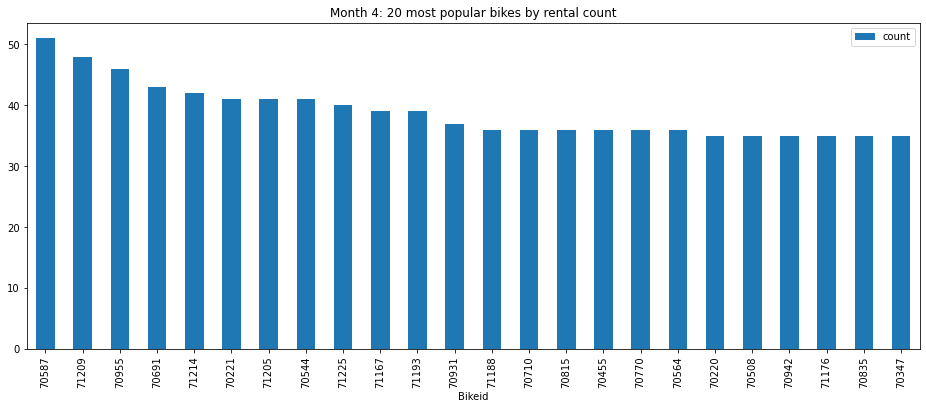

In [37]:

bike_count = df[['Starttime','Bikeid']].copy()
bike_count = bike_count.copy()

bike_count.columns = ['Date','Bikeid']
bike_count['Date'] = pd.to_datetime(bike_count['Date']).dt.month

bike_count = bike_count.loc[bike_count['Date'] == filter_month]
bike_count = bike_count.groupby(['Bikeid'])['Bikeid'].count()
bike_count = bike_count.sort_values(ascending=False)

keys = bike_count.keys()
counts = bike_count.tolist()

df_2_4 = pd.DataFrame({'Bikeid':keys[0:24], 'count':counts[0:24]})
df_2_4["Bikeid"] = df_2_4["Bikeid"].astype(str)
title = 'Month ' + str(filter_month) + ": 20 most popular bikes by rental count"
ax = df_2_4.plot.bar(x='Bikeid', y='count', title=title, figsize=(16,6))

---
### Task 3

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 3.1

In [45]:

from sklearn.cluster import KMeans, DBSCAN

df = pd.read_csv('HealthyRideRentals2021-Q2.csv')


rebal = df[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal['Startdate'] = pd.to_datetime(rebal['Starttime']).dt.date
rebal = rebal.sort_values(by=['Bikeid', 'Startdate'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
rebal = rebal.reset_index(drop=True)
rebal['Rebal'] = rebal.apply(calcrebal, axis=1)

fs = rebal[['Startdate', 'Bikeid', 'From station id']].copy()
fs = fs[fs.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
fs = fs.reset_index(drop=True)

tos = rebal[['Startdate', 'Bikeid', 'To station id']].copy()
tos = tos[tos.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]
tos = tos.reset_index(drop=True)

rebalCNT_p = pd.pivot_table(rebal,index=['Startdate', 'From station id'], values=['Rebal'], aggfunc='sum')
rebalCNT = rebalCNT_p.reset_index()
rebalCNT.columns = ['Day', 'StationID', 'rebalCNT']

fromCNT_p = pd.pivot_table(fs,index=['Startdate', 'From station id'], values=['From station id'],aggfunc=lambda x: len(x))
fromCNT = fromCNT_p.reset_index()
fromCNT.columns = ['Day', 'StationID', 'fromCNT']

toCNT_p = pd.pivot_table(tos,index=['Startdate', 'To station id'], values=['To station id'],aggfunc=lambda x: len(x))
toCNT = toCNT_p.reset_index()
toCNT.columns = ['Day', 'StationID', 'toCNT']

rebalCNT = rebalCNT.sort_values(by=['Day', 'StationID'])
fromCNT = fromCNT.sort_values(by=['Day', 'StationID'])
toCNT = toCNT.sort_values(by=['Day', 'StationID'])

fromto = fromCNT.merge(toCNT, how='outer', on=['Day', 'StationID'])
fromto = fromto.fillna(0)
fromto = fromto.sort_values(by=['Day', 'StationID'])

df_final_4 = pd.merge(fromto, rebalCNT, how='outer', on=['Day', 'StationID'])
df_final_4 = df_final_4.fillna(0)
df_final_4.drop('toCNT', axis=1, inplace=True)

df_final_4['Month'] = pd.to_datetime(df_final_4['Day']).dt.month
df_final_4.drop('Day', axis=1, inplace=True)

df_april = df_final_4.loc[df_final_4['Month'] == 4]
df_may = df_final_4.loc[df_final_4['Month'] == 5]
df_june = df_final_4.loc[df_final_4['Month'] == 6]

df_april = df_april.groupby(["StationID", "Month"]).sum().reset_index()
df_april.columns = ['StationID', 'Month', 'fromCNT4', 'rebalCNT4']
df_april.drop('Month', axis=1, inplace=True)
df_may = df_may.groupby(["StationID", "Month"]).sum().reset_index()
df_may.columns = ['StationID', 'Month', 'fromCNT5', 'rebalCNT5']
df_may.drop('Month', axis=1, inplace=True)
df_june = df_june.groupby(["StationID", "Month"]).sum().reset_index()
df_june.columns = ['StationID', 'Month', 'fromCNT6', 'rebalCNT6']
df_june.drop('Month', axis=1, inplace=True)

df_aprilmay = pd.merge(df_april, df_may, how='outer', on=['StationID'])
df_aprilmay = df_aprilmay.fillna(0)
df_aprilmay = df_aprilmay.sort_values(by=['StationID'])

dfz =  pd.merge(df_aprilmay, df_june, how='outer', on=['StationID'])
dfz = dfz.fillna(0)

db_param = [(20,3),(30,3),(60,3)]
dbscan1 = DBSCAN(eps=db_param[0][0], min_samples = db_param[0][1]).fit_predict(dfz)
dbscan2 = DBSCAN(eps=db_param[1][0], min_samples = db_param[1][1]).fit_predict(dfz)
dbscan3 = DBSCAN(eps=db_param[2][0], min_samples = db_param[2][1]).fit_predict(dfz)

kmeans_param = [2, 3, 6]
kmeans1 = KMeans(n_clusters=kmeans_param[0]).fit_predict(dfz)
kmeans2 = KMeans(n_clusters=kmeans_param[1]).fit_predict(dfz)
kmeans3 = KMeans(n_clusters=kmeans_param[2]).fit_predict(dfz)

### Task 3.2

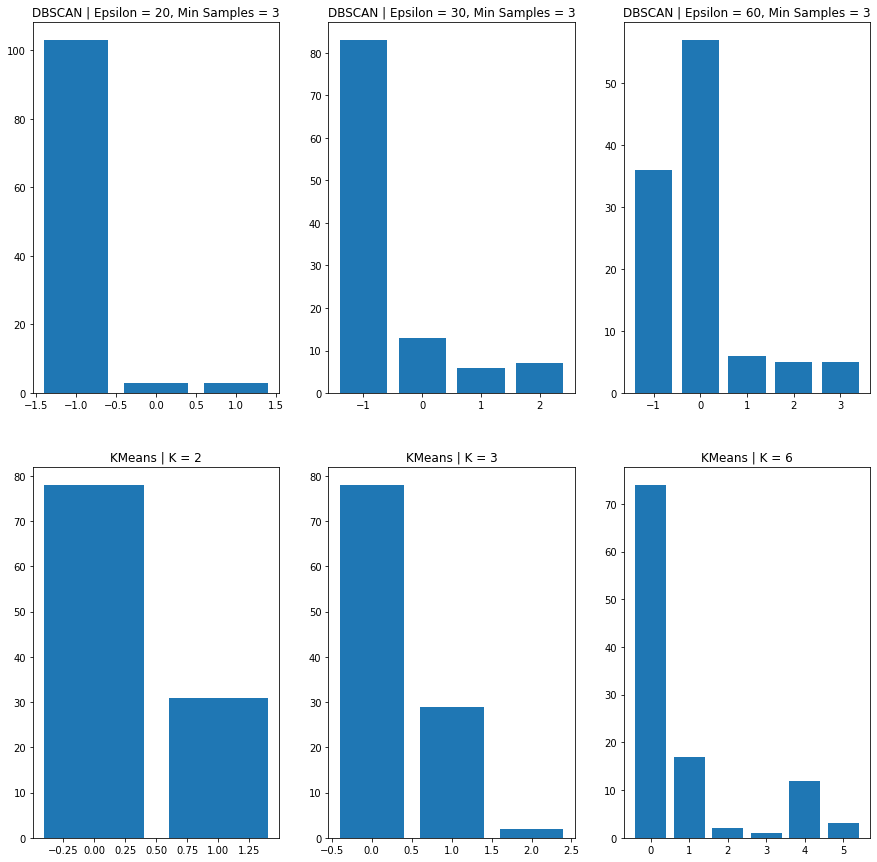

In [46]:
dbresults = [dbscan1, dbscan2, dbscan3]
kresults = [kmeans1,kmeans2,kmeans3]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,15))


for index, val in enumerate(dbresults):
    u, count = np.unique(val, return_counts=True)
    count_sort_ind = np.argsort(-count)
    xs = (u[count_sort_ind])
    ys = (count[count_sort_ind])
    axes[0,index].bar(xs,ys)
    axes[0,index].set_title(f'DBSCAN | Epsilon = {db_param[index][0]}, Min Samples = {db_params[index][1]}')


for index, val in enumerate(kresults):
    u, count = np.unique(val, return_counts=True)
    count_sort_ind = np.argsort(-u)
    xs = (u[count_sort_ind])
    ys = (count[count_sort_ind])
    axes[1,index].bar(xs,ys)
    axes[1,index].set_title(f'KMeans | K = {kmeans_param[index]}')
    
plt.show()

### Task 3.3

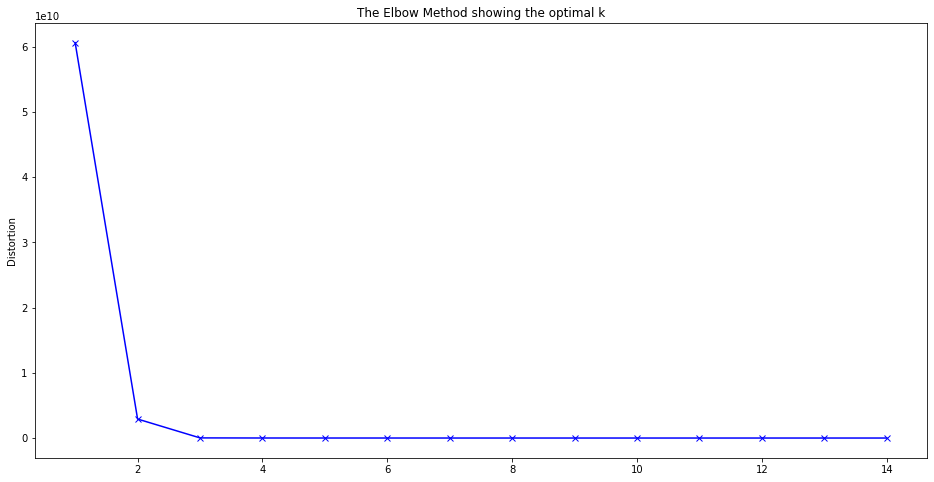

In [47]:

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfz)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


The Optimal K value should be 3 given the visualization in the elbow method as K is where the trend line plateaus which indicates the maximum minization for distortion given each K value. Increasing the K value would not return better results.

While DBSCAN diminishes the effects of outliers, the context of this issue calls for the consideration of outliers to perform clustering analysis. Additionally, there is a large amount of noise in the visualization for DBSCAN given the parameters, which would indicate that a significant portion of the data was not considered. This would indicate that the results are not necessarily accurate and applicable to the scenario. Therefore, the K means is more preferable to the DBSCAN given the results.